In [ ]:
import numpy as np
from sklearn.datasets import make_friedman1  # для створення датасету
import pandas as pd
from sklearn.linear_model import LinearRegression  # завдання 1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt  # для побудови кривих
from sklearn.model_selection import learning_curve
# для завдання 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from keras import backend as K  # для r2

Для ознайомлення з бібліотекою Numpy було пройдено notebook з вправами: https://colab.research.google.com/drive/1Z8gqTUuszL6AULsFpLWkj2JKcerJZNS1?usp=sharing
А також прочитано відповідну статтю-вступ до роботи з масивами Numpy, вказану у методичних вказівках до лабораторної: https://www.datacamp.com/tutorial/python-numpy-tutorial

### Початок
 Генеруємо початковий датасет з 150000 екземплярів, 10 фіч, 1 регресійною ціллю, додаємо трохи шуму для більшої реалістичної даних.

In [ ]:
X, y = make_friedman1(n_samples=150000, n_features=10, noise=0.15, random_state=42)

df = pd.DataFrame(data=X, columns=[f'feature_{i+1}' for i in range(10)])
df['target'] = y
# перші 5 рядків датасету
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,16.752222
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,6.118455
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,9.609137
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,21.403535
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,16.687214


### **Завдання 1.**

In [ ]:
# Розділимо дані на навчальний та тестувальний набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ініціалізуємо модель лін. регресії та навчимо її
lr = LinearRegression()
lr.fit(X_train, y_train)

# Робимо прогноз на тестовому наборі, вимірюємо помилку MSE, R^2
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
df_lr = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred })
df_lr.head()

Mean Squared Error: 5.924377659541355
R^2 score: 0.7509633682338035


,Actual,Predicted
0,18.717270,17.287893
1,23.833289,23.903421
2,19.351575,18.414939
3,21.494295,22.623616
4,10.057036,8.178308


Побудуємо криві навчання для лінійної регресії.

In [ ]:
# Функція для побудови кривих навчання
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

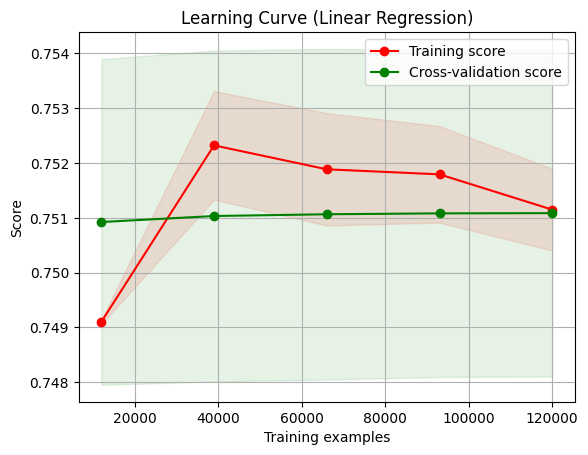

In [ ]:
plot_learning_curve(lr, "Learning Curve (Linear Regression)", X, y, cv=5, n_jobs=-1)
plt.show()

### **Завдання 2.**

DNN: 1, 5, 25 шарів; optimizer: SGD, RMSProp, Adam; learning rate: 0.1, 0.01, 0.001; loss function: MSE.

Для оцінки якості моделі машинного навчання будемо використовувати метрики R^2 (коефіцієнт детермінації) та MAPE (середньоабсолютна відсоткова похибка):

**R^2** показує, наскільки добре модель передбачає реальні значення вихідної змінної. R^2 може приймати значення від 0 до 1, де 1 означає ідеальне узгодження між передбачуваними та реальними значеннями, а 0 -- відсутність узгодження. Зазвичай чим ближче R^2 до 1, тим краще модель.

**MAPE** вимірює середню абсолютну відсоткову похибку моделі. Вона обчислюється як середнє абсолютне значення відсоткових похибок між прогнозованими та фактичними значеннями. MAPE дозволяє оцінити точність моделі в абсолютних відсотках: чим менше значення MAPE, тим краще модель.

Ці метрики допомагають зрозуміти, наскільки добре модель працює на навчальних та валідаційних даних, і визначити, чи необхідно внести зміни в модель для покращення її результатів.

In [ ]:
def compute_mape_chunked(y_true, y_pred, chunk_size=1000):
    mape_chunks = []
    for i in range(0, len(y_true), chunk_size):
        y_true_chunk = y_true[i:i+chunk_size]
        y_pred_chunk = y_pred[i:i+chunk_size]
        mape_chunks.append(np.mean(np.abs((y_true_chunk - y_pred_chunk) / y_true_chunk)) * 100)
    return np.mean(mape_chunks)

R^2 за формулою, https://www.cuemath.com/r-squared-formula/.
K.epsilon() -- для уникнення ділення на 0.

In [ ]:
def r2(y_train, y_pred):  # r2 = 1 - (SSR/SST)
    SSR =  K.sum(K.square(y_train - y_pred))
    SST = K.sum(K.square(y_train - K.mean(y_train)))
    return ( 1 - SSR/(SST + K.epsilon()))

#### **DNN з 1 прихованим шаром**

In [ ]:
def build_model(layer):  # Створення моделі
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='relu'))  # перший шар нейронів з 10 вхідних ознак
    for _ in range(layer):  # додаємо всі додаткові шари
        model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))  # останній шар
    return model

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 2.9038 - mse: 14.9791 - r2: 0.3539 - mape: 23.4770 - val_loss: 1.8310 - val_mse: 6.0460 - val_r2: 0.7454 - val_mape: 15.8220
Epoch 2/40
844/844 [==============================] - 4s 5ms/step - loss: 1.9721 - mse: 6.5213 - r2: 0.7211 - mape: 15.9337 - val_loss: 1.8667 - val_mse: 5.8276 - val_r2: 0.7540 - val_mape: 16.3220
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 1.6755 - mse: 4.6489 - r2: 0.8008 - mape: 13.5287 - val_loss: 1.1971 - val_mse: 2.6697 - val_r2: 0.8876 - val_mape: 10.5354
Epoch 4/40
844/844 [==============================] - 3s 4ms/step - loss: 1.4104 - mse: 3.3154 - r2: 0.8588 - mape: 11.1596 - val_loss: 1.7265 - val_mse: 4.1663 - val_r2: 0.8247 - val_mape: 12.1145
Epoch 5/40
844/844 [==============================] - 3s 4ms/step - loss: 1.1322 - mse: 2.1612 - r2: 0.9079 - mape: 8.7972 - val_loss: 1.4089 - val_mse: 2.8127 - val_r2: 0.8813 - val_mape: 11.3962
Epoch 6/40

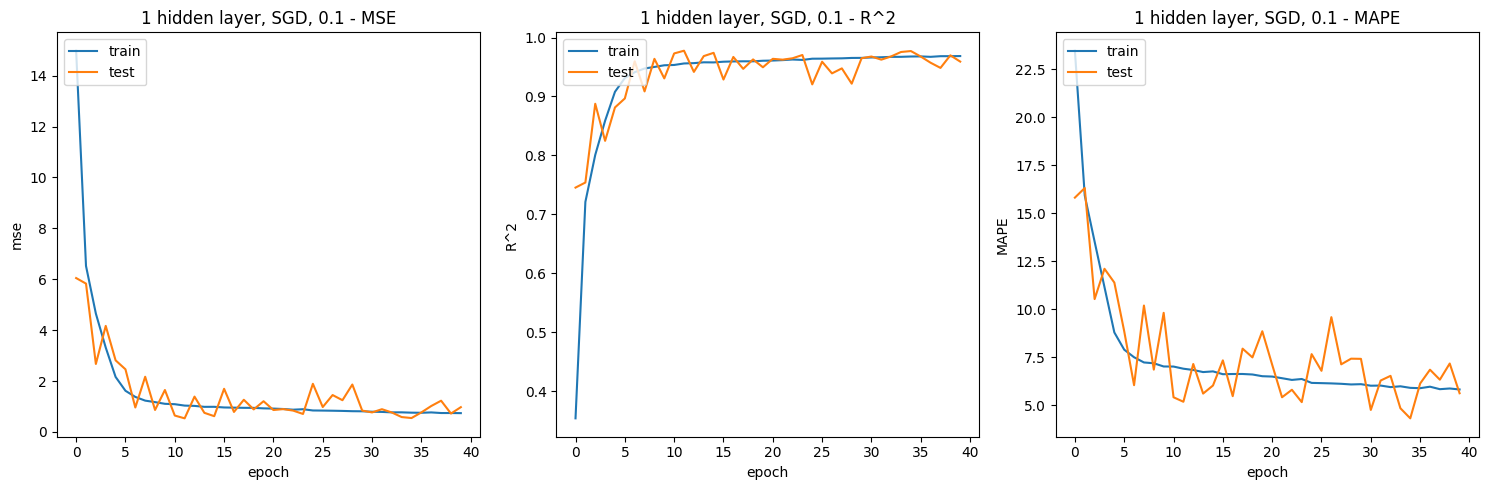

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3230 - mse: 0.1815 - r2: 0.9922 - mape: 2.9575 - val_loss: 0.3182 - val_mse: 0.1754 - val_r2: 0.9926 - val_mape: 2.9452
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3104 - mse: 0.1670 - r2: 0.9929 - mape: 2.8524 - val_loss: 0.3099 - val_mse: 0.1667 - val_r2: 0.9930 - val_mape: 2.9163
Epoch 3/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3047 - mse: 0.1607 - r2: 0.9931 - mape: 2.7979 - val_loss: 0.3053 - val_mse: 0.1620 - val_r2: 0.9932 - val_mape: 2.8924
Epoch 4/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2998 - mse: 0.1555 - r2: 0.9934 - mape: 2.7563 - val_loss: 0.2993 - val_mse: 0.1552 - val_r2: 0.9934 - val_mape: 2.8005
Epoch 5/40
844/844 [==============================] - 3s 4ms/step - loss: 0.2958 - mse: 0.1511 - r2: 0.9935 - mape: 2.7149 - val_loss: 0.2999 - val_mse: 0.1556 - val_r2: 0.9934 - val_mape: 2.7659
Epoch 6/40
844/844 [

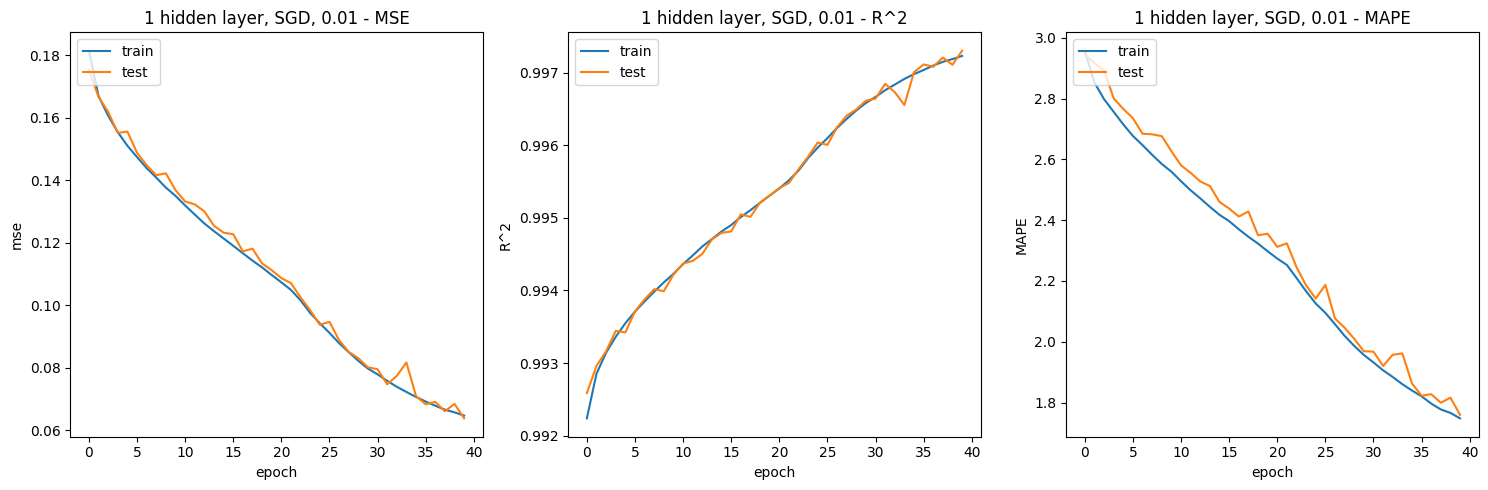

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 0.1930 - mse: 0.0616 - r2: 0.9974 - mape: 1.7116 - val_loss: 0.1956 - val_mse: 0.0632 - val_r2: 0.9973 - val_mape: 1.7561
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1928 - mse: 0.0615 - r2: 0.9974 - mape: 1.7092 - val_loss: 0.1953 - val_mse: 0.0631 - val_r2: 0.9973 - val_mape: 1.7518
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1927 - mse: 0.0614 - r2: 0.9974 - mape: 1.7082 - val_loss: 0.1953 - val_mse: 0.0628 - val_r2: 0.9973 - val_mape: 1.7500
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.1925 - mse: 0.0613 - r2: 0.9974 - mape: 1.7067 - val_loss: 0.1950 - val_mse: 0.0627 - val_r2: 0.9974 - val_mape: 1.7472
Epoch 5/40
844/844 [==============================] - 3s 4ms/step - loss: 0.1924 - mse: 0.0612 - r2: 0.9974 - mape: 1.7052 - val_loss: 0.1951 - val_mse: 0.0629 - val_r2: 0.9973 - val_mape: 1.7488
Epoch 6/40
844/844 [

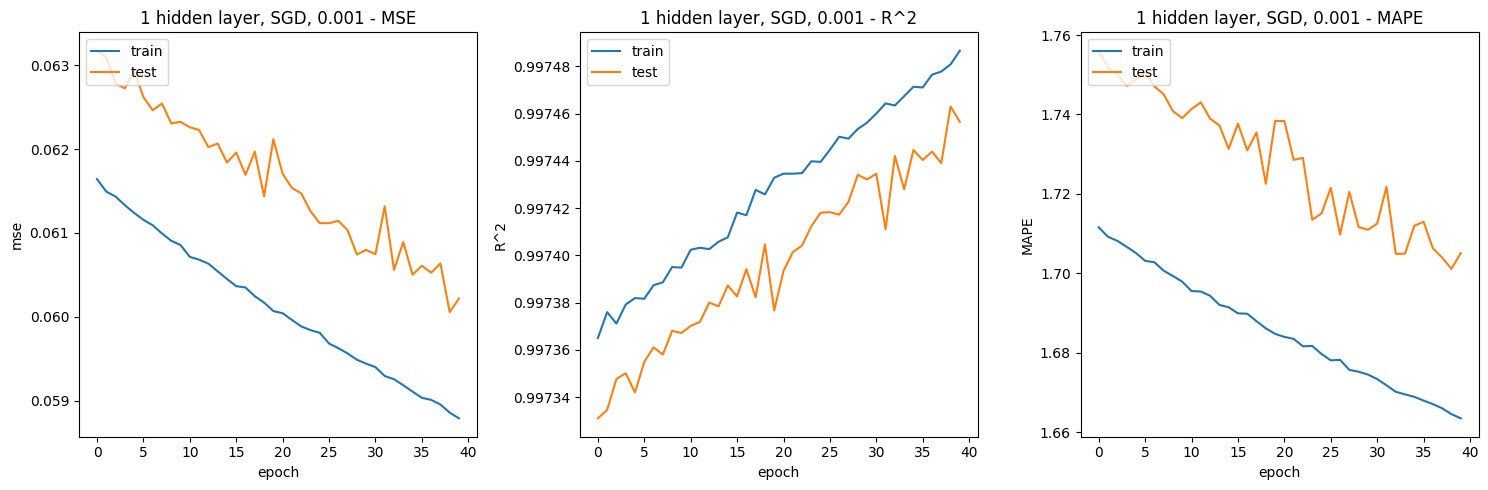

Epoch 1/40
844/844 [==============================] - 38s 44ms/step - loss: 1.5321 - mse: 5.0249 - r2: 0.7848 - mape: 12.8379 - val_loss: 1.8733 - val_mse: 5.0006 - val_r2: 0.7902 - val_mape: 19.1903
Epoch 2/40
844/844 [==============================] - 4s 4ms/step - loss: 1.3030 - mse: 2.7022 - r2: 0.8846 - mape: 11.2609 - val_loss: 1.3017 - val_mse: 2.5291 - val_r2: 0.8940 - val_mape: 12.6264
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 1.2524 - mse: 2.5032 - r2: 0.8933 - mape: 10.8511 - val_loss: 1.9545 - val_mse: 4.9244 - val_r2: 0.7930 - val_mape: 17.1681
Epoch 4/40
844/844 [==============================] - 3s 4ms/step - loss: 1.2236 - mse: 2.3876 - r2: 0.8983 - mape: 10.5891 - val_loss: 0.9539 - val_mse: 1.5356 - val_r2: 0.9359 - val_mape: 7.8126
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 1.1929 - mse: 2.2723 - r2: 0.9033 - mape: 10.3346 - val_loss: 0.8778 - val_mse: 1.2148 - val_r2: 0.9489 - val_mape: 7.3927
Epoch 6/40

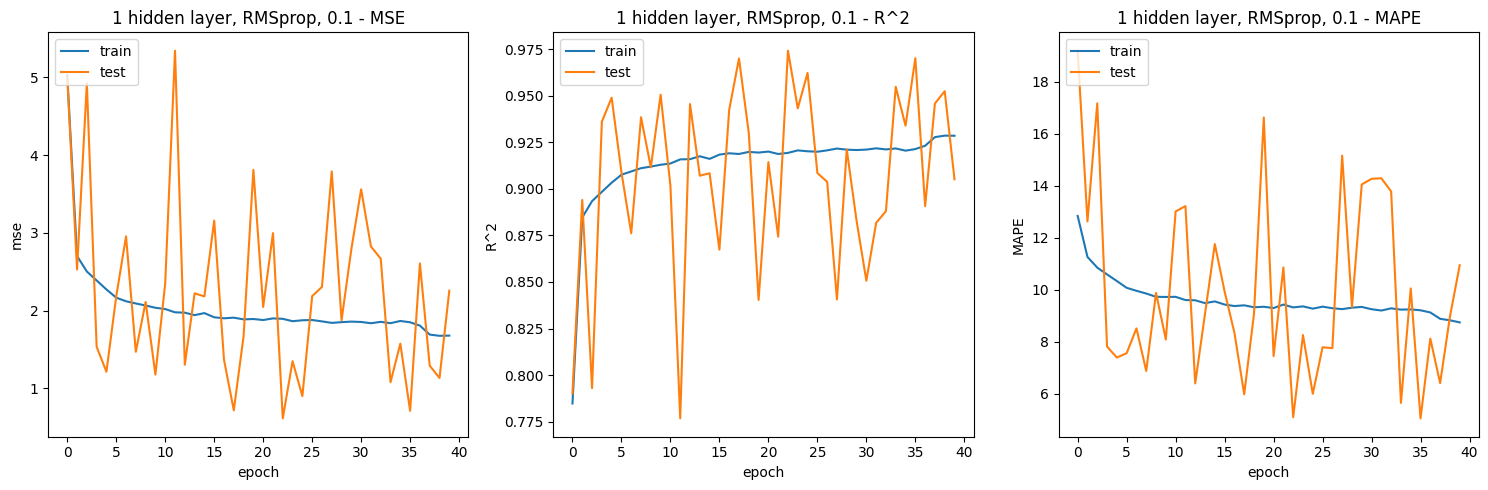

Epoch 1/40
844/844 [==============================] - 4s 4ms/step - loss: 0.4161 - mse: 0.2861 - r2: 0.9878 - mape: 3.5493 - val_loss: 0.4057 - val_mse: 0.2734 - val_r2: 0.9885 - val_mape: 3.4857
Epoch 2/40
844/844 [==============================] - 4s 5ms/step - loss: 0.4022 - mse: 0.2697 - r2: 0.9884 - mape: 3.4357 - val_loss: 0.4233 - val_mse: 0.2814 - val_r2: 0.9881 - val_mape: 3.5792
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3977 - mse: 0.2644 - r2: 0.9887 - mape: 3.3904 - val_loss: 0.3901 - val_mse: 0.2477 - val_r2: 0.9895 - val_mape: 3.3660
Epoch 4/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3946 - mse: 0.2602 - r2: 0.9889 - mape: 3.3547 - val_loss: 0.4161 - val_mse: 0.3094 - val_r2: 0.9869 - val_mape: 3.5166
Epoch 5/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3934 - mse: 0.2592 - r2: 0.9889 - mape: 3.3492 - val_loss: 0.4149 - val_mse: 0.2993 - val_r2: 0.9874 - val_mape: 3.5113
Epoch 6/40
844/844 [

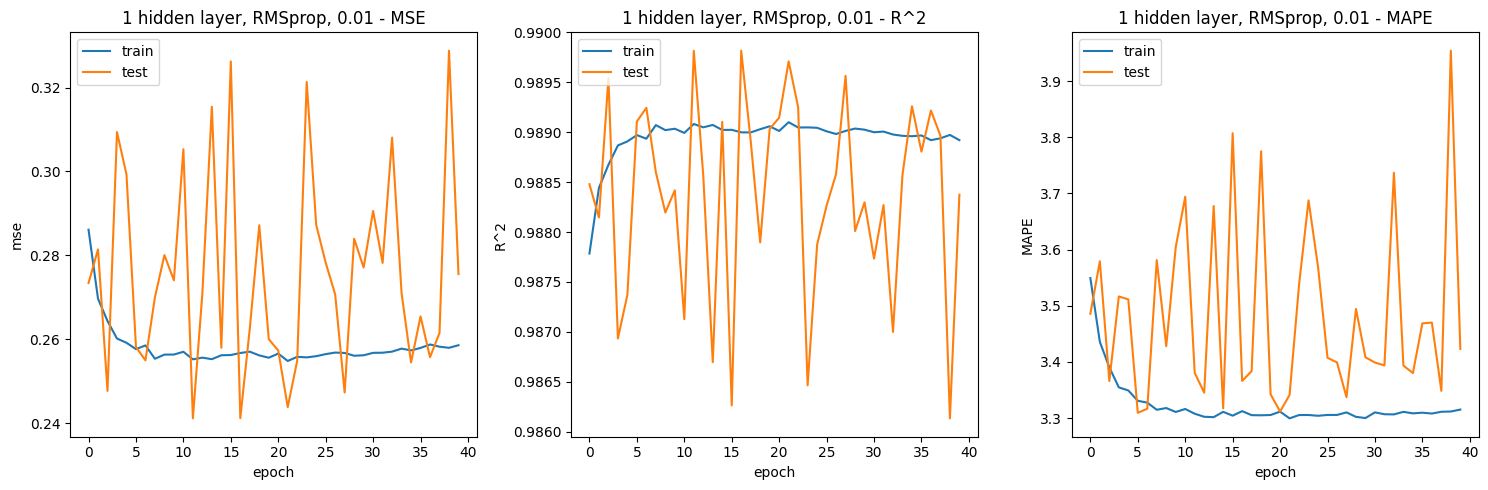

Epoch 1/40
844/844 [==============================] - 8s 8ms/step - loss: 0.3715 - mse: 0.2395 - r2: 0.9897 - mape: 3.1786 - val_loss: 0.3741 - val_mse: 0.2403 - val_r2: 0.9899 - val_mape: 3.2427
Epoch 2/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3709 - mse: 0.2389 - r2: 0.9898 - mape: 3.1754 - val_loss: 0.3731 - val_mse: 0.2402 - val_r2: 0.9899 - val_mape: 3.2492
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3708 - mse: 0.2389 - r2: 0.9898 - mape: 3.1752 - val_loss: 0.3731 - val_mse: 0.2453 - val_r2: 0.9896 - val_mape: 3.2408
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.3707 - mse: 0.2393 - r2: 0.9898 - mape: 3.1770 - val_loss: 0.3736 - val_mse: 0.2413 - val_r2: 0.9898 - val_mape: 3.2454
Epoch 5/40
844/844 [==============================] - 6s 7ms/step - loss: 0.3705 - mse: 0.2394 - r2: 0.9897 - mape: 3.1771 - val_loss: 0.3720 - val_mse: 0.2403 - val_r2: 0.9898 - val_mape: 3.2317
Epoch 6/40
844/844 [

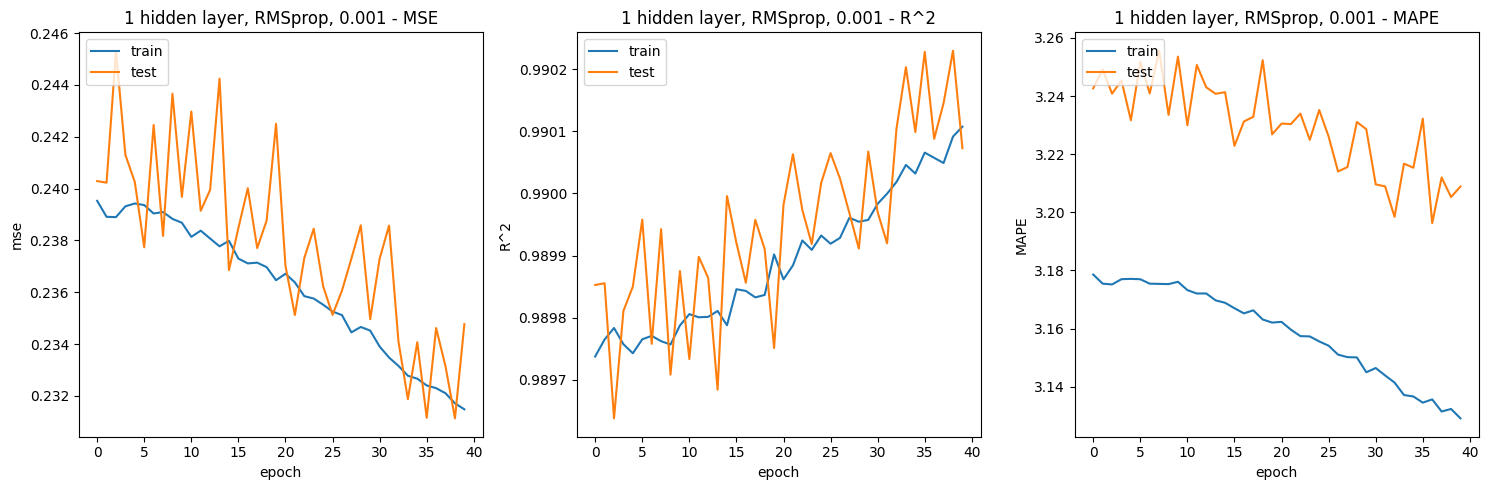

Epoch 1/40
844/844 [==============================] - 7s 6ms/step - loss: 0.4391 - mse: 0.3328 - r2: 0.9858 - mape: 3.7723 - val_loss: 0.4685 - val_mse: 0.3882 - val_r2: 0.9837 - val_mape: 4.5795
Epoch 2/40
844/844 [==============================] - 5s 6ms/step - loss: 0.4298 - mse: 0.3166 - r2: 0.9864 - mape: 3.6854 - val_loss: 0.3919 - val_mse: 0.2674 - val_r2: 0.9887 - val_mape: 3.3380
Epoch 3/40
844/844 [==============================] - 5s 5ms/step - loss: 0.4252 - mse: 0.3068 - r2: 0.9869 - mape: 3.6049 - val_loss: 0.3793 - val_mse: 0.2487 - val_r2: 0.9895 - val_mape: 3.2871
Epoch 4/40
844/844 [==============================] - 6s 7ms/step - loss: 0.4194 - mse: 0.3001 - r2: 0.9872 - mape: 3.5796 - val_loss: 0.4136 - val_mse: 0.2883 - val_r2: 0.9878 - val_mape: 3.5201
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 0.4244 - mse: 0.3050 - r2: 0.9869 - mape: 3.5803 - val_loss: 0.4055 - val_mse: 0.2958 - val_r2: 0.9875 - val_mape: 3.7131
Epoch 6/40
844/844 [

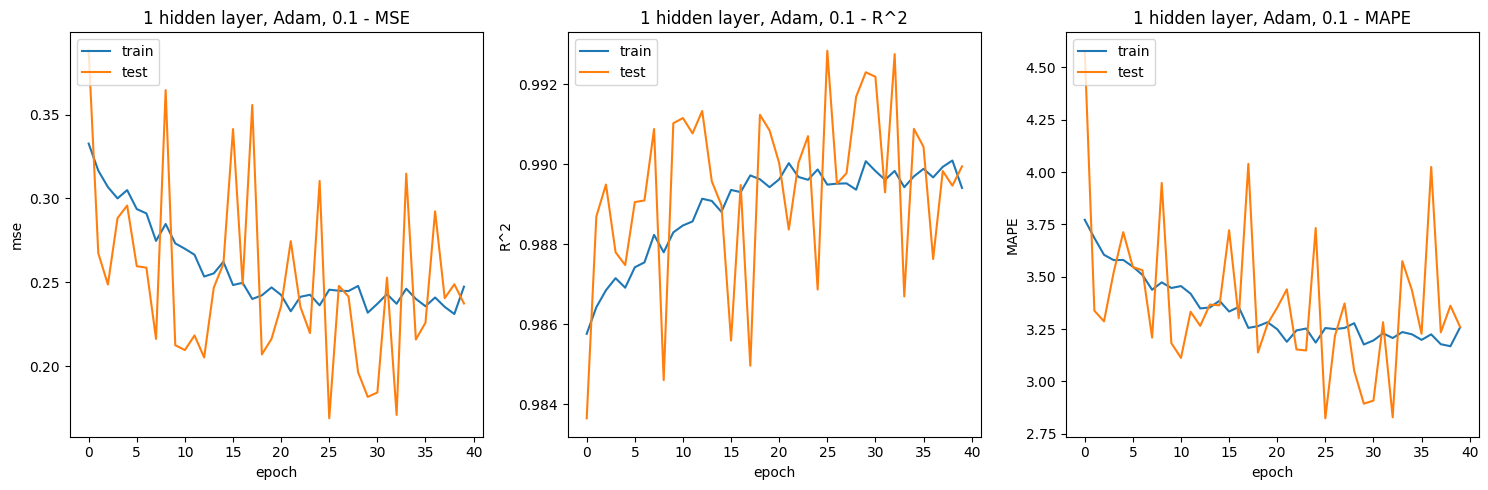

Epoch 1/40
844/844 [==============================] - 5s 5ms/step - loss: 0.3074 - mse: 0.1683 - r2: 0.9928 - mape: 2.7092 - val_loss: 0.3021 - val_mse: 0.1663 - val_r2: 0.9929 - val_mape: 2.7158
Epoch 2/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3052 - mse: 0.1680 - r2: 0.9928 - mape: 2.6846 - val_loss: 0.3039 - val_mse: 0.1650 - val_r2: 0.9930 - val_mape: 2.7178
Epoch 3/40
844/844 [==============================] - 3s 4ms/step - loss: 0.3062 - mse: 0.1692 - r2: 0.9927 - mape: 2.6818 - val_loss: 0.3018 - val_mse: 0.1636 - val_r2: 0.9931 - val_mape: 2.7074
Epoch 4/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3071 - mse: 0.1696 - r2: 0.9927 - mape: 2.6801 - val_loss: 0.3080 - val_mse: 0.1659 - val_r2: 0.9930 - val_mape: 2.7506
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 0.3044 - mse: 0.1681 - r2: 0.9928 - mape: 2.6556 - val_loss: 0.3007 - val_mse: 0.1639 - val_r2: 0.9930 - val_mape: 2.6782
Epoch 6/40
844/844 [

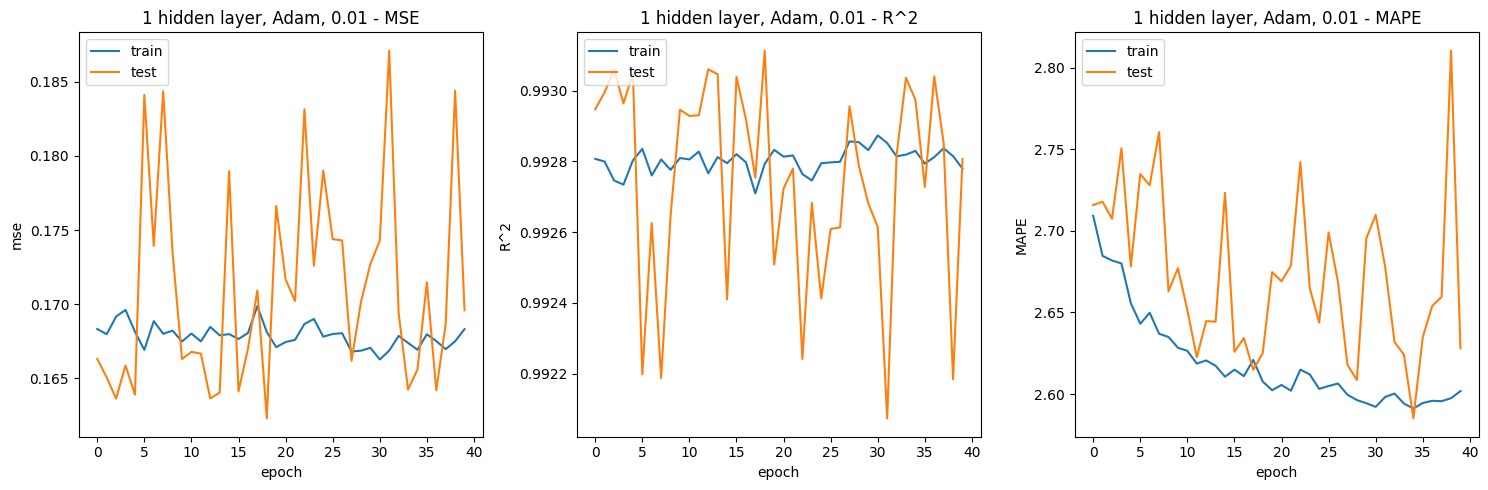

Epoch 1/40
844/844 [==============================] - 5s 4ms/step - loss: 0.2963 - mse: 0.1608 - r2: 0.9931 - mape: 2.5365 - val_loss: 0.3024 - val_mse: 0.1720 - val_r2: 0.9927 - val_mape: 2.5994
Epoch 2/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2957 - mse: 0.1604 - r2: 0.9931 - mape: 2.5322 - val_loss: 0.2981 - val_mse: 0.1622 - val_r2: 0.9931 - val_mape: 2.5949
Epoch 3/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2959 - mse: 0.1607 - r2: 0.9931 - mape: 2.5331 - val_loss: 0.2977 - val_mse: 0.1635 - val_r2: 0.9931 - val_mape: 2.5881
Epoch 4/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2959 - mse: 0.1609 - r2: 0.9931 - mape: 2.5340 - val_loss: 0.2983 - val_mse: 0.1659 - val_r2: 0.9930 - val_mape: 2.5769
Epoch 5/40
844/844 [==============================] - 6s 7ms/step - loss: 0.2958 - mse: 0.1608 - r2: 0.9931 - mape: 2.5333 - val_loss: 0.2980 - val_mse: 0.1636 - val_r2: 0.9931 - val_mape: 2.5797
Epoch 6/40
844/844 [

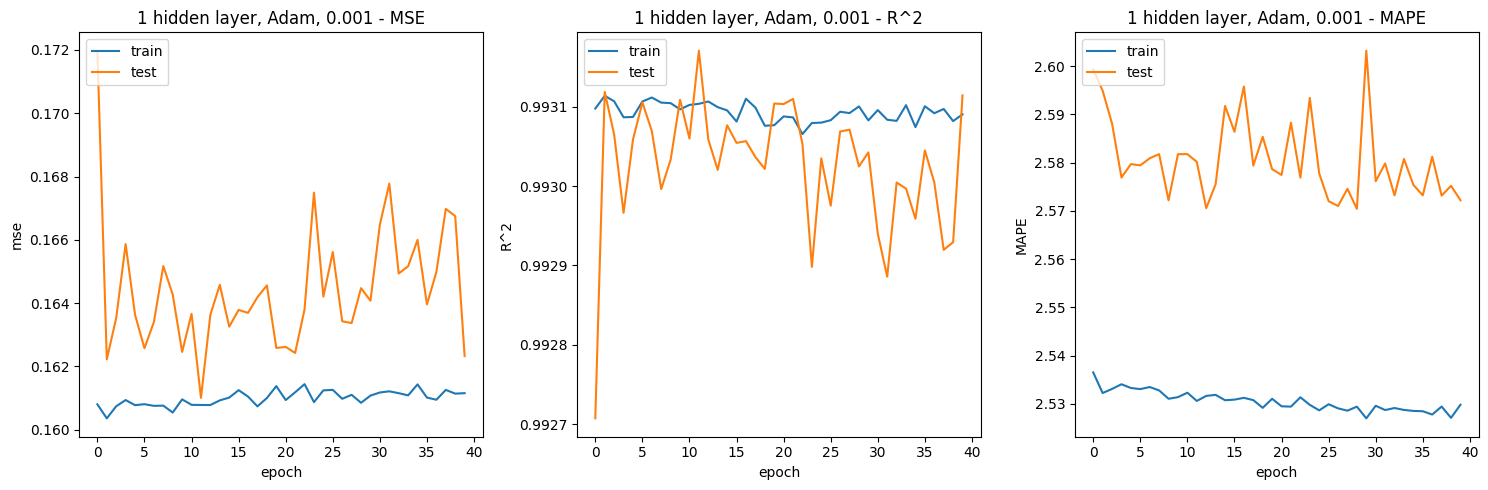

In [ ]:
optimizers = [SGD, RMSprop, Adam]
optimizers_names = ['SGD', 'RMSprop', 'Adam']
learning_rates = [0.1, 0.01, 0.001]
layer = 1

model = build_model(layer)

for i in range(len(optimizers)):
    for lr in learning_rates:

        model.compile(optimizer=optimizers[i](lr), loss='mean_absolute_error', metrics=['mse', r2, 'mape'])
        history = model.fit(X_train, y_train, epochs=40, validation_split=0.1, batch_size=128)

        # Графік кривих навчання
        print(history.history.keys())

        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        # MSE
        axs[0].plot(history.history['mse'])
        axs[0].plot(history.history['val_mse'])
        axs[0].set_title(f'1 hidden layer, {optimizers_names[i]}, {lr} - MSE')
        axs[0].set_ylabel('mse')
        axs[0].set_xlabel('epoch')
        axs[0].legend(['train', 'test'], loc='upper left')

        # R2
        axs[1].plot(history.history['r2'])
        axs[1].plot(history.history['val_r2'])
        axs[1].set_title(f'1 hidden layer, {optimizers_names[i]}, {lr} - R^2')
        axs[1].set_ylabel('R^2')
        axs[1].set_xlabel('epoch')
        axs[1].legend(['train', 'test'], loc='upper left')

        # MAPE
        axs[2].plot(history.history['mape'])
        axs[2].plot(history.history['val_mape'])
        axs[2].set_title(f'1 hidden layer, {optimizers_names[i]}, {lr} - MAPE')
        axs[2].set_ylabel('MAPE')
        axs[2].set_xlabel('epoch')
        axs[2].legend(['train', 'test'], loc='upper left')

        plt.tight_layout()
        plt.show()


#### **DNN з 5 прихованими шарами**

Використаємо раніше створену функцію build_model() для побудови моделі.

Epoch 1/40
844/844 [==============================] - 5s 5ms/step - loss: 3.0862 - mse: 16.5675 - r2: 0.2927 - mape: 26.2808 - val_loss: 2.1586 - val_mse: 6.9602 - val_r2: 0.7067 - val_mape: 16.8248
Epoch 2/40
844/844 [==============================] - 5s 5ms/step - loss: 2.0663 - mse: 6.8258 - r2: 0.7087 - mape: 17.4578 - val_loss: 3.0777 - val_mse: 12.1678 - val_r2: 0.4874 - val_mape: 22.1218
Epoch 3/40
844/844 [==============================] - 4s 5ms/step - loss: 1.7283 - mse: 4.8260 - r2: 0.7941 - mape: 14.5902 - val_loss: 1.1452 - val_mse: 2.3841 - val_r2: 0.8991 - val_mape: 10.6661
Epoch 4/40
844/844 [==============================] - 4s 4ms/step - loss: 1.4390 - mse: 3.2915 - r2: 0.8592 - mape: 11.9457 - val_loss: 1.0370 - val_mse: 1.8600 - val_r2: 0.9212 - val_mape: 8.9019
Epoch 5/40
844/844 [==============================] - 5s 5ms/step - loss: 1.2214 - mse: 2.3166 - r2: 0.9009 - mape: 10.2563 - val_loss: 1.4287 - val_mse: 2.7555 - val_r2: 0.8841 - val_mape: 11.6104
Epoch 6/4

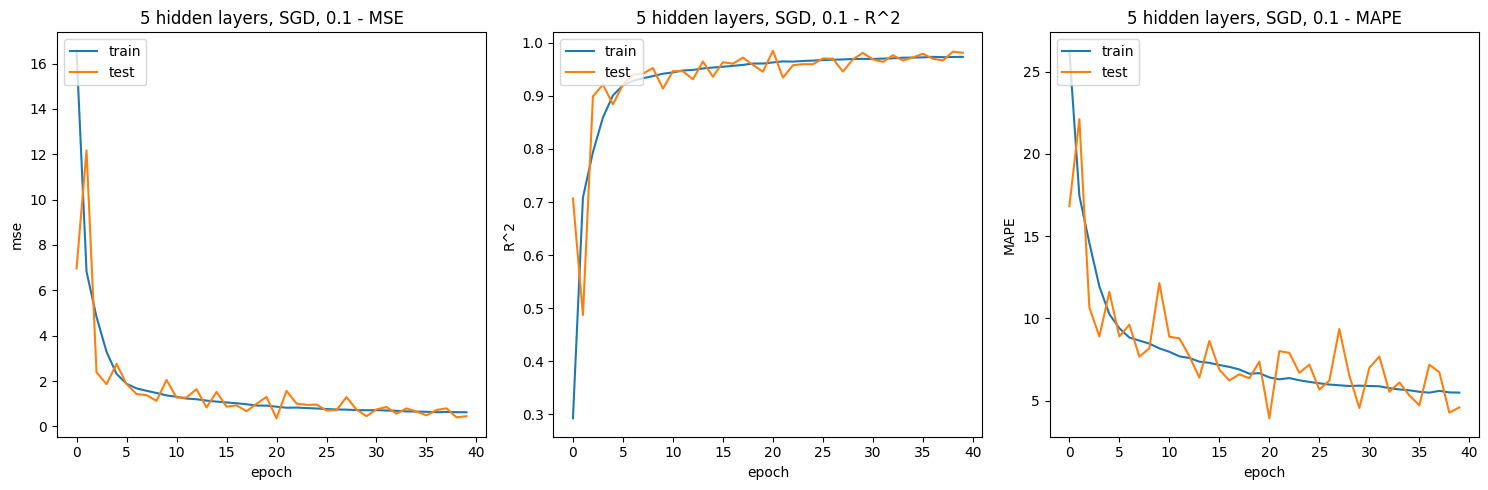

Epoch 1/40
844/844 [==============================] - 6s 5ms/step - loss: 0.3338 - mse: 0.1887 - r2: 0.9919 - mape: 2.8636 - val_loss: 0.3232 - val_mse: 0.1789 - val_r2: 0.9924 - val_mape: 2.8532
Epoch 2/40
844/844 [==============================] - 4s 5ms/step - loss: 0.3186 - mse: 0.1722 - r2: 0.9926 - mape: 2.7598 - val_loss: 0.3186 - val_mse: 0.1740 - val_r2: 0.9926 - val_mape: 2.8583
Epoch 3/40
844/844 [==============================] - 4s 5ms/step - loss: 0.3114 - mse: 0.1644 - r2: 0.9930 - mape: 2.7011 - val_loss: 0.3143 - val_mse: 0.1706 - val_r2: 0.9928 - val_mape: 2.9249
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.3058 - mse: 0.1589 - r2: 0.9932 - mape: 2.6642 - val_loss: 0.3027 - val_mse: 0.1576 - val_r2: 0.9933 - val_mape: 2.6763
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 0.3010 - mse: 0.1539 - r2: 0.9934 - mape: 2.6154 - val_loss: 0.3040 - val_mse: 0.1585 - val_r2: 0.9933 - val_mape: 2.6877
Epoch 6/40
844/844 [

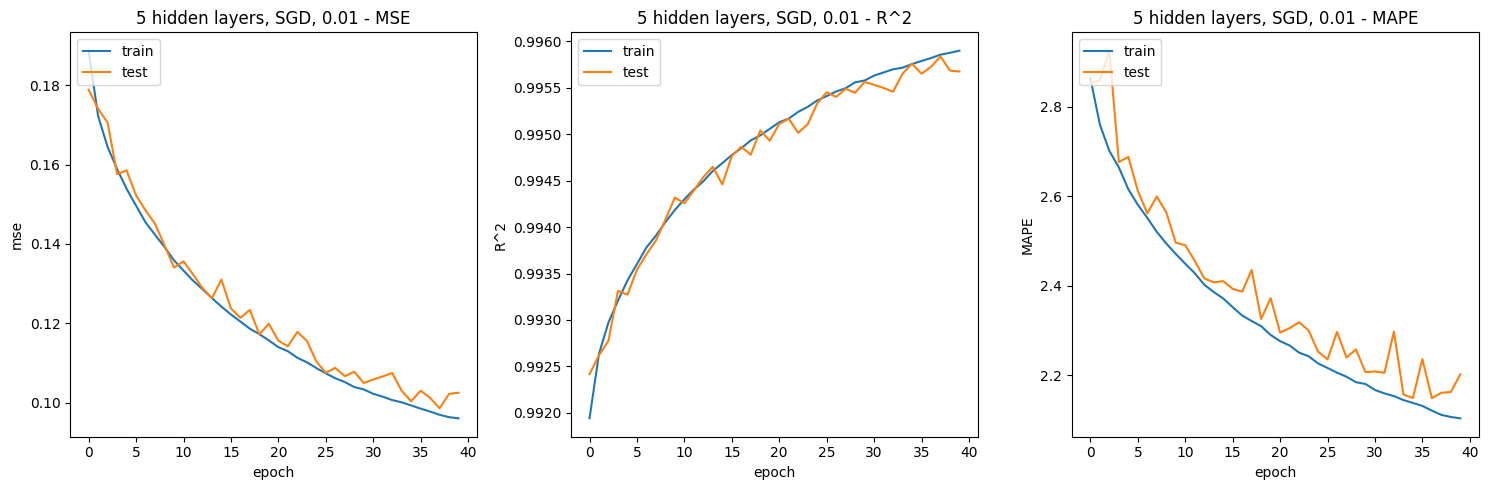

Epoch 1/40
844/844 [==============================] - 6s 6ms/step - loss: 0.2337 - mse: 0.0911 - r2: 0.9961 - mape: 2.0433 - val_loss: 0.2358 - val_mse: 0.0932 - val_r2: 0.9961 - val_mape: 2.0876
Epoch 2/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2331 - mse: 0.0906 - r2: 0.9961 - mape: 2.0389 - val_loss: 0.2356 - val_mse: 0.0932 - val_r2: 0.9961 - val_mape: 2.0759
Epoch 3/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2329 - mse: 0.0905 - r2: 0.9961 - mape: 2.0356 - val_loss: 0.2356 - val_mse: 0.0931 - val_r2: 0.9961 - val_mape: 2.0851
Epoch 4/40
844/844 [==============================] - 5s 5ms/step - loss: 0.2328 - mse: 0.0904 - r2: 0.9961 - mape: 2.0348 - val_loss: 0.2352 - val_mse: 0.0929 - val_r2: 0.9961 - val_mape: 2.0884
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2327 - mse: 0.0903 - r2: 0.9961 - mape: 2.0335 - val_loss: 0.2351 - val_mse: 0.0929 - val_r2: 0.9961 - val_mape: 2.0769
Epoch 6/40
844/844 [

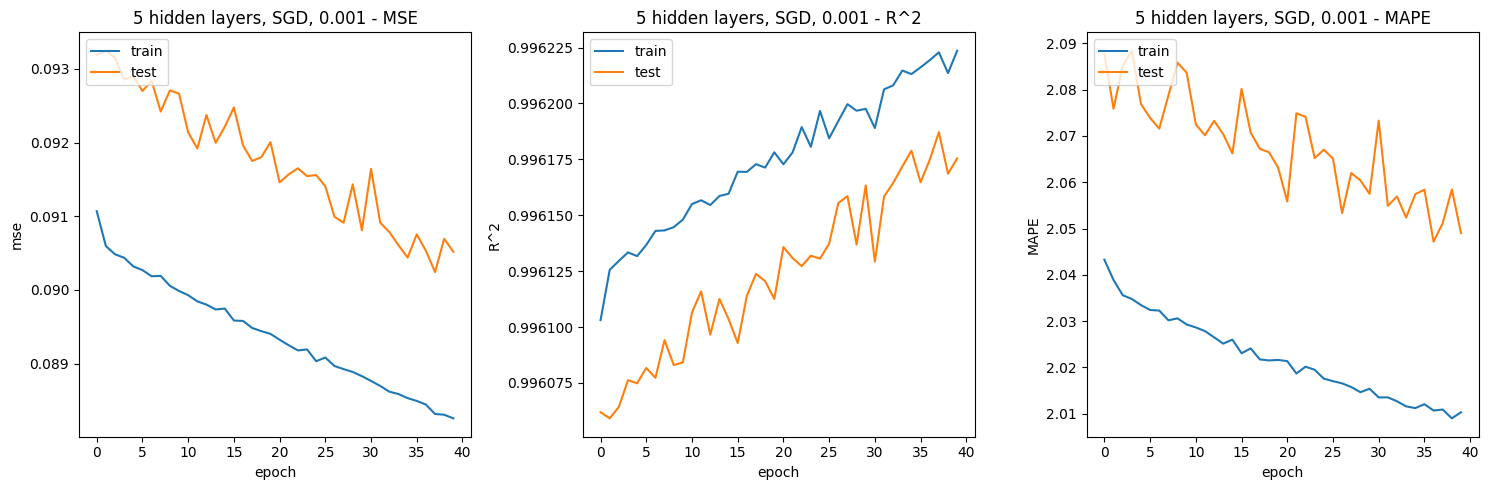

Epoch 1/40
844/844 [==============================] - 6s 5ms/step - loss: 5.1216 - mse: 4174.1489 - r2: -178.9511 - mape: 47.0653 - val_loss: 3.6939 - val_mse: 20.4705 - val_r2: 0.1436 - val_mape: 34.2853
Epoch 2/40
844/844 [==============================] - 4s 5ms/step - loss: 2.2016 - mse: 12.7455 - r2: 0.4506 - mape: 20.1385 - val_loss: 1.8096 - val_mse: 4.9162 - val_r2: 0.7924 - val_mape: 17.4467
Epoch 3/40
844/844 [==============================] - 4s 5ms/step - loss: 1.8143 - mse: 6.6966 - r2: 0.7213 - mape: 16.3769 - val_loss: 1.2920 - val_mse: 2.7976 - val_r2: 0.8828 - val_mape: 13.2181
Epoch 4/40
844/844 [==============================] - 5s 5ms/step - loss: 1.7307 - mse: 4.9532 - r2: 0.7891 - mape: 15.2477 - val_loss: 1.5306 - val_mse: 3.6597 - val_r2: 0.8459 - val_mape: 15.1746
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 1.7320 - mse: 4.9972 - r2: 0.7870 - mape: 15.1904 - val_loss: 2.2805 - val_mse: 7.3083 - val_r2: 0.6933 - val_mape: 17.8886
Ep

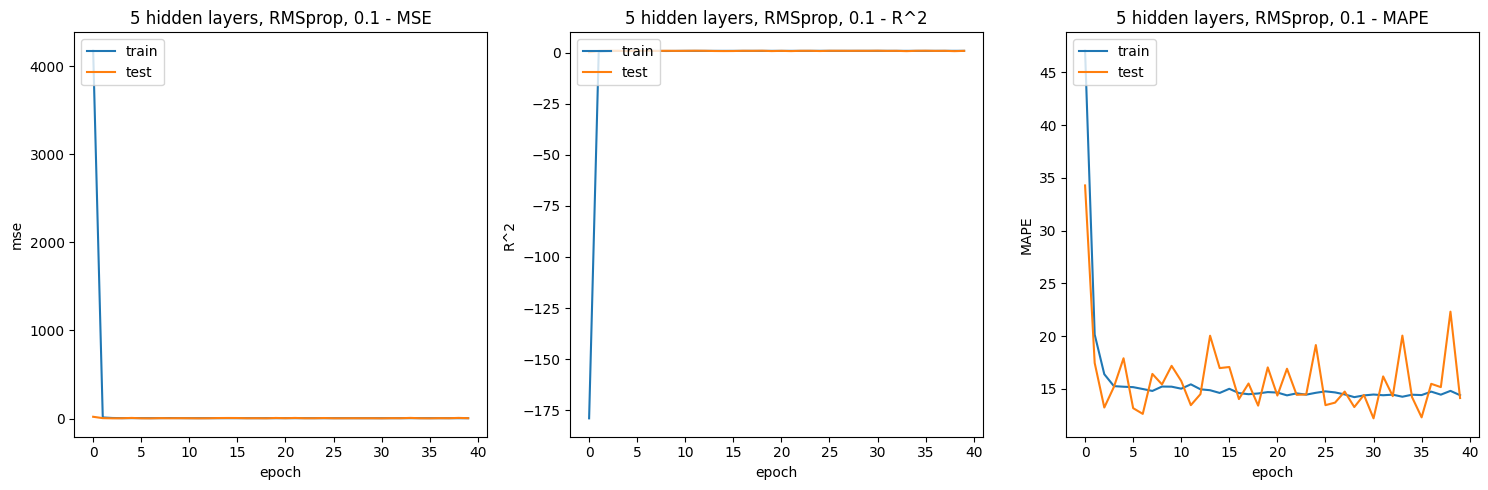

Epoch 1/40
844/844 [==============================] - 6s 5ms/step - loss: 0.9350 - mse: 1.6432 - r2: 0.9305 - mape: 8.7560 - val_loss: 0.8319 - val_mse: 1.2706 - val_r2: 0.9468 - val_mape: 8.1968
Epoch 2/40
844/844 [==============================] - 4s 5ms/step - loss: 0.7951 - mse: 1.1267 - r2: 0.9521 - mape: 7.5817 - val_loss: 0.7307 - val_mse: 0.9560 - val_r2: 0.9597 - val_mape: 7.1979
Epoch 3/40
844/844 [==============================] - 5s 6ms/step - loss: 0.7380 - mse: 0.9419 - r2: 0.9599 - mape: 7.0518 - val_loss: 0.7055 - val_mse: 0.8602 - val_r2: 0.9637 - val_mape: 7.0292
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.7060 - mse: 0.8576 - r2: 0.9634 - mape: 6.7189 - val_loss: 0.7264 - val_mse: 0.9005 - val_r2: 0.9619 - val_mape: 6.7411
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 0.6878 - mse: 0.8145 - r2: 0.9653 - mape: 6.5220 - val_loss: 0.9534 - val_mse: 1.3559 - val_r2: 0.9429 - val_mape: 8.9490
Epoch 6/40
844/844 [

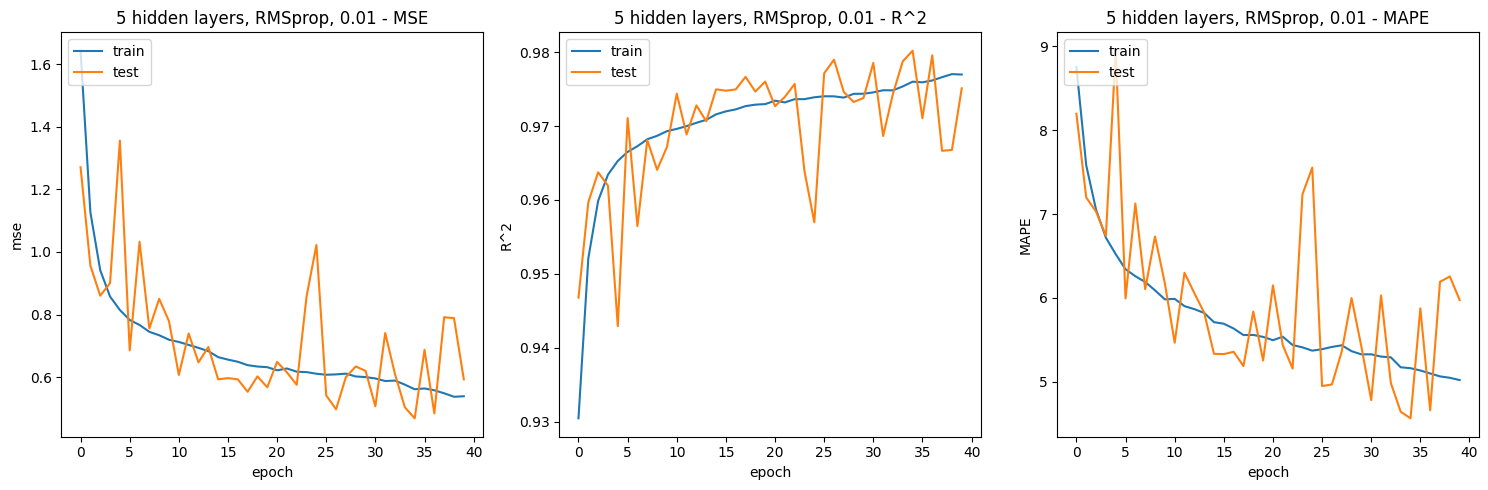

Epoch 1/40
844/844 [==============================] - 6s 5ms/step - loss: 0.4639 - mse: 0.3782 - r2: 0.9838 - mape: 4.0672 - val_loss: 0.4696 - val_mse: 0.3881 - val_r2: 0.9836 - val_mape: 4.2524
Epoch 2/40
844/844 [==============================] - 4s 5ms/step - loss: 0.4614 - mse: 0.3778 - r2: 0.9838 - mape: 4.0515 - val_loss: 0.4730 - val_mse: 0.4091 - val_r2: 0.9827 - val_mape: 4.2214
Epoch 3/40
844/844 [==============================] - 5s 6ms/step - loss: 0.4602 - mse: 0.3773 - r2: 0.9838 - mape: 4.0404 - val_loss: 0.4653 - val_mse: 0.3920 - val_r2: 0.9834 - val_mape: 4.1551
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.4594 - mse: 0.3796 - r2: 0.9838 - mape: 4.0360 - val_loss: 0.4644 - val_mse: 0.3947 - val_r2: 0.9834 - val_mape: 4.1852
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 0.4591 - mse: 0.3816 - r2: 0.9836 - mape: 4.0324 - val_loss: 0.4641 - val_mse: 0.3956 - val_r2: 0.9833 - val_mape: 4.1622
Epoch 6/40
844/844 [

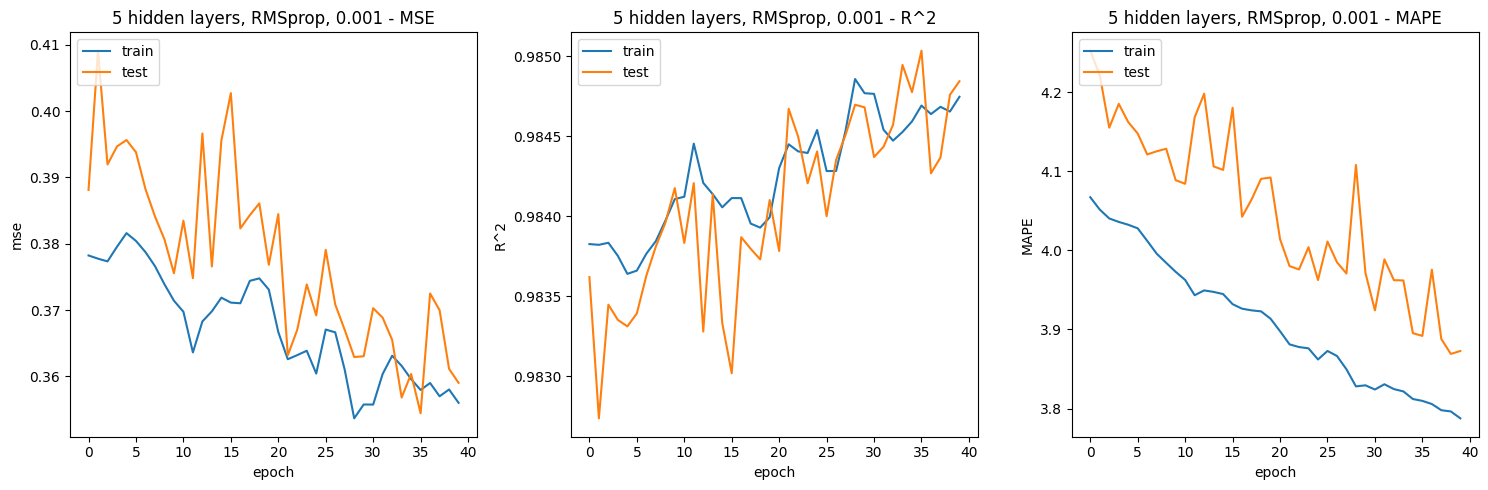

Epoch 1/40
844/844 [==============================] - 7s 6ms/step - loss: 0.8350 - mse: 1.4126 - r2: 0.9399 - mape: 7.0190 - val_loss: 0.7447 - val_mse: 0.9273 - val_r2: 0.9609 - val_mape: 6.5024
Epoch 2/40
844/844 [==============================] - 5s 5ms/step - loss: 0.8398 - mse: 1.2984 - r2: 0.9447 - mape: 7.3332 - val_loss: 1.0083 - val_mse: 1.4944 - val_r2: 0.9369 - val_mape: 8.2715
Epoch 3/40
844/844 [==============================] - 4s 5ms/step - loss: 0.7607 - mse: 1.0809 - r2: 0.9540 - mape: 6.6022 - val_loss: 1.2759 - val_mse: 4.6889 - val_r2: 0.8029 - val_mape: 10.4107
Epoch 4/40
844/844 [==============================] - 5s 6ms/step - loss: 2.4666 - mse: 12.7779 - r2: 0.4582 - mape: 22.3962 - val_loss: 3.7727 - val_mse: 21.5431 - val_r2: 0.1018 - val_mape: 37.3766
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 1.4933 - mse: 4.5207 - r2: 0.8079 - mape: 13.9168 - val_loss: 1.2544 - val_mse: 2.4620 - val_r2: 0.8965 - val_mape: 10.1954
Epoch 6/40
84

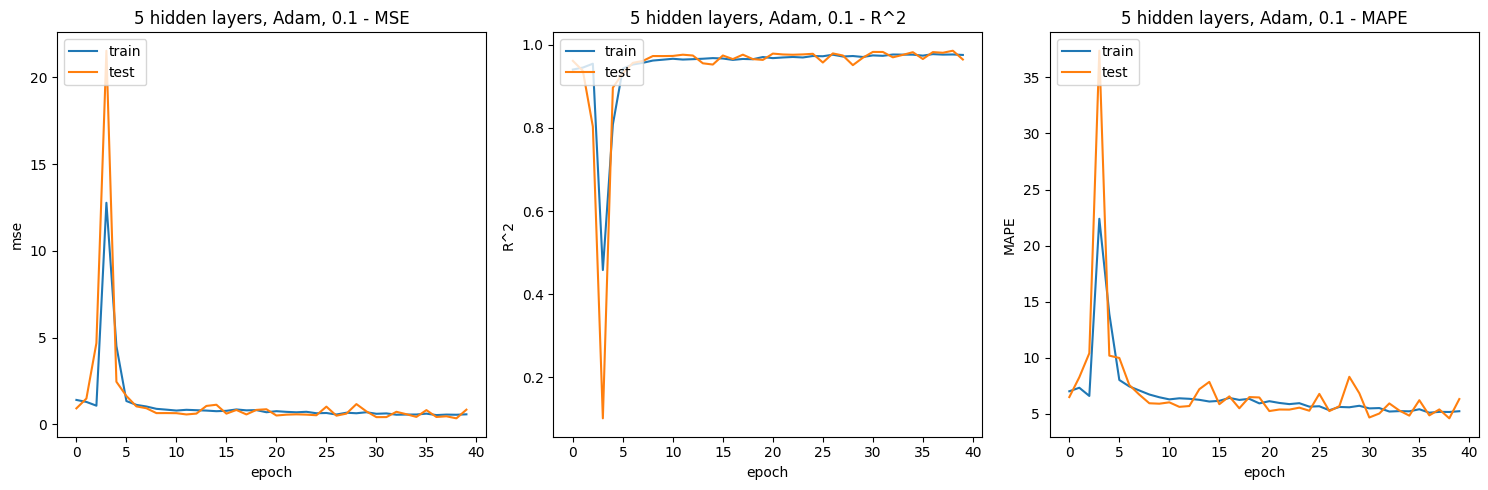

Epoch 1/40
844/844 [==============================] - 10s 9ms/step - loss: 0.4248 - mse: 0.3143 - r2: 0.9866 - mape: 4.0696 - val_loss: 0.4938 - val_mse: 0.4076 - val_r2: 0.9828 - val_mape: 4.4934
Epoch 2/40
844/844 [==============================] - 6s 7ms/step - loss: 0.4190 - mse: 0.3022 - r2: 0.9871 - mape: 3.9485 - val_loss: 0.4110 - val_mse: 0.2993 - val_r2: 0.9874 - val_mape: 3.9773
Epoch 3/40
844/844 [==============================] - 8s 9ms/step - loss: 0.4174 - mse: 0.2971 - r2: 0.9873 - mape: 3.8760 - val_loss: 0.4086 - val_mse: 0.2872 - val_r2: 0.9879 - val_mape: 3.9003
Epoch 4/40
844/844 [==============================] - 4s 5ms/step - loss: 0.4110 - mse: 0.2886 - r2: 0.9877 - mape: 3.7940 - val_loss: 0.4128 - val_mse: 0.2958 - val_r2: 0.9875 - val_mape: 3.8661
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 0.4078 - mse: 0.2837 - r2: 0.9879 - mape: 3.7392 - val_loss: 0.4088 - val_mse: 0.2867 - val_r2: 0.9879 - val_mape: 3.8457
Epoch 6/40
844/844 

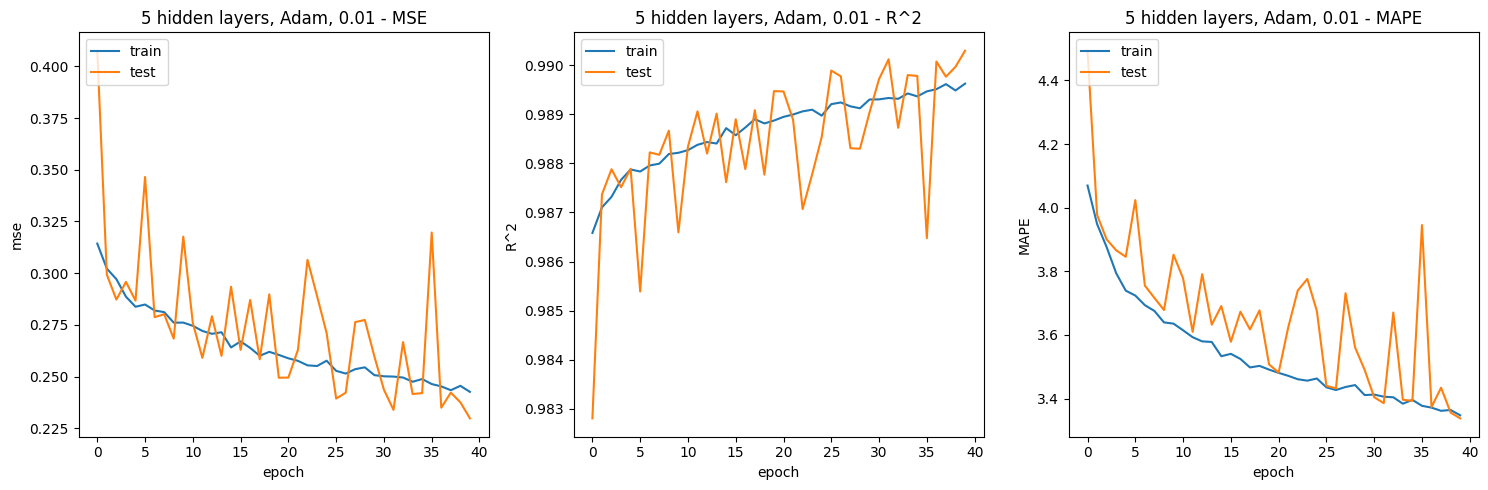

Epoch 1/40
844/844 [==============================] - 10s 8ms/step - loss: 0.3621 - mse: 0.2281 - r2: 0.9902 - mape: 3.2502 - val_loss: 0.3626 - val_mse: 0.2288 - val_r2: 0.9903 - val_mape: 3.3237
Epoch 2/40
844/844 [==============================] - 5s 5ms/step - loss: 0.3611 - mse: 0.2270 - r2: 0.9903 - mape: 3.2471 - val_loss: 0.3622 - val_mse: 0.2272 - val_r2: 0.9904 - val_mape: 3.3162
Epoch 3/40
844/844 [==============================] - 4s 5ms/step - loss: 0.3611 - mse: 0.2273 - r2: 0.9903 - mape: 3.2465 - val_loss: 0.3615 - val_mse: 0.2271 - val_r2: 0.9904 - val_mape: 3.3092
Epoch 4/40
844/844 [==============================] - 5s 6ms/step - loss: 0.3608 - mse: 0.2270 - r2: 0.9903 - mape: 3.2455 - val_loss: 0.3613 - val_mse: 0.2270 - val_r2: 0.9904 - val_mape: 3.3112
Epoch 5/40
844/844 [==============================] - 4s 5ms/step - loss: 0.3610 - mse: 0.2271 - r2: 0.9903 - mape: 3.2457 - val_loss: 0.3612 - val_mse: 0.2269 - val_r2: 0.9904 - val_mape: 3.3111
Epoch 6/40
844/844 

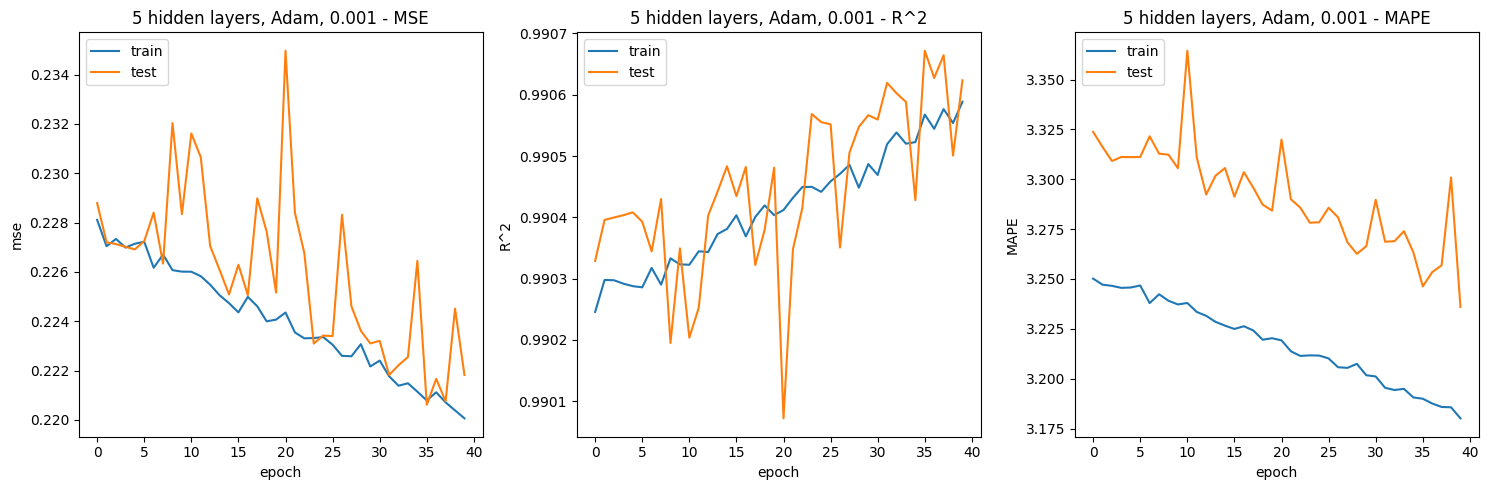

In [ ]:
optimizers = [SGD, RMSprop, Adam]
optimizers_names = ['SGD', 'RMSprop', 'Adam']
learning_rates = [0.1, 0.01, 0.001]
layer = 5

model = build_model(layer)

for i in range(len(optimizers)):
    for lr in learning_rates:

        model.compile(optimizer=optimizers[i](lr), loss='mean_absolute_error', metrics=['mse', r2, 'mape'])
        history = model.fit(X_train, y_train, epochs=40, validation_split=0.1, batch_size=128)

        # Графік кривих навчання
        print(history.history.keys())

        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        # MSE
        axs[0].plot(history.history['mse'])
        axs[0].plot(history.history['val_mse'])
        axs[0].set_title(f'5 hidden layers, {optimizers_names[i]}, {lr} - MSE')
        axs[0].set_ylabel('mse')
        axs[0].set_xlabel('epoch')
        axs[0].legend(['train', 'test'], loc='upper left')

        # R2
        axs[1].plot(history.history['r2'])
        axs[1].plot(history.history['val_r2'])
        axs[1].set_title(f'5 hidden layers, {optimizers_names[i]}, {lr} - R^2')
        axs[1].set_ylabel('R^2')
        axs[1].set_xlabel('epoch')
        axs[1].legend(['train', 'test'], loc='upper left')

        # MAPE
        axs[2].plot(history.history['mape'])
        axs[2].plot(history.history['val_mape'])
        axs[2].set_title(f'5 hidden layers, {optimizers_names[i]}, {lr} - MAPE')
        axs[2].set_ylabel('MAPE')
        axs[2].set_xlabel('epoch')
        axs[2].legend(['train', 'test'], loc='upper left')

        plt.tight_layout()
        plt.show()


#### **DNN з 25 прихованими шарами**

*на графіках пише 5, але там 25 шарів.

Epoch 1/40
844/844 [==============================] - 12s 10ms/step - loss: 4.1975 - mse: 27.8788 - r2: -0.1726 - mape: 38.8845 - val_loss: 4.0047 - val_mse: 24.2039 - val_r2: -0.0086 - val_mape: 38.1928
Epoch 2/40
844/844 [==============================] - 8s 9ms/step - loss: 3.9942 - mse: 24.0444 - r2: -0.0176 - mape: 37.7769 - val_loss: 4.0726 - val_mse: 25.0733 - val_r2: -0.0449 - val_mape: 41.6141
Epoch 3/40
844/844 [==============================] - 7s 9ms/step - loss: 3.9904 - mse: 23.9856 - r2: -0.0158 - mape: 37.7679 - val_loss: 4.0041 - val_mse: 24.1853 - val_r2: -0.0077 - val_mape: 38.8198
Epoch 4/40
844/844 [==============================] - 8s 9ms/step - loss: 3.9872 - mse: 23.9480 - r2: -0.0136 - mape: 37.7684 - val_loss: 4.0455 - val_mse: 24.7263 - val_r2: -0.0303 - val_mape: 40.8788
Epoch 5/40
844/844 [==============================] - 7s 9ms/step - loss: 3.9845 - mse: 23.9109 - r2: -0.0123 - mape: 37.7494 - val_loss: 4.0076 - val_mse: 24.2448 - val_r2: -0.0104 - val_ma

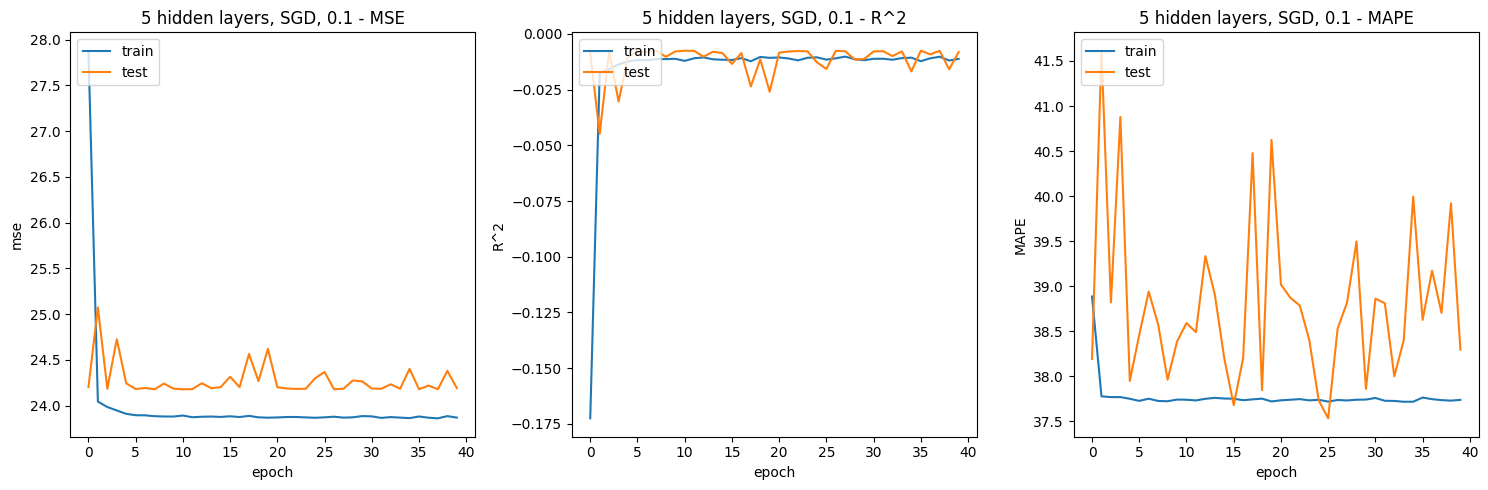

Epoch 1/40
844/844 [==============================] - 12s 10ms/step - loss: 3.9768 - mse: 23.8137 - r2: -0.0083 - mape: 37.6777 - val_loss: 4.0048 - val_mse: 24.1930 - val_r2: -0.0080 - val_mape: 38.9297
Epoch 2/40
844/844 [==============================] - 7s 9ms/step - loss: 3.9771 - mse: 23.8107 - r2: -0.0083 - mape: 37.7077 - val_loss: 4.0034 - val_mse: 24.1815 - val_r2: -0.0076 - val_mape: 38.4784
Epoch 3/40
844/844 [==============================] - 8s 10ms/step - loss: 3.9770 - mse: 23.8117 - r2: -0.0079 - mape: 37.6935 - val_loss: 4.0036 - val_mse: 24.1798 - val_r2: -0.0075 - val_mape: 38.6711
Epoch 4/40
844/844 [==============================] - 8s 10ms/step - loss: 3.9769 - mse: 23.8117 - r2: -0.0089 - mape: 37.6954 - val_loss: 4.0037 - val_mse: 24.1806 - val_r2: -0.0075 - val_mape: 38.7053
Epoch 5/40
844/844 [==============================] - 7s 9ms/step - loss: 3.9770 - mse: 23.8111 - r2: -0.0086 - mape: 37.7028 - val_loss: 4.0035 - val_mse: 24.1795 - val_r2: -0.0075 - val_

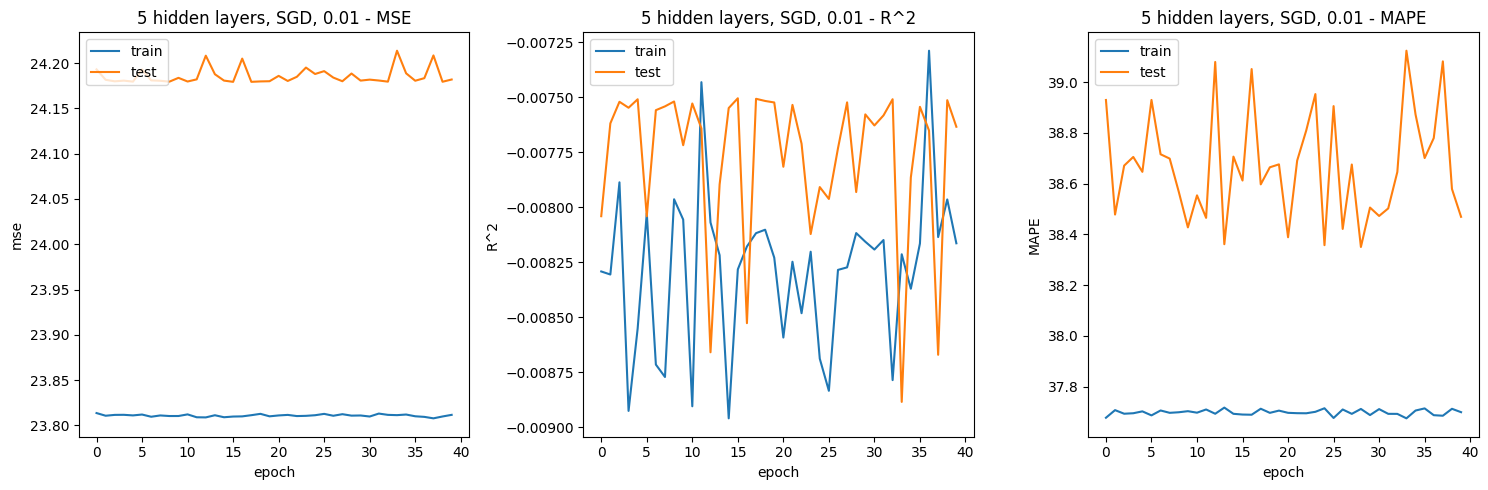

Epoch 1/40
844/844 [==============================] - 12s 10ms/step - loss: 3.9766 - mse: 23.8060 - r2: -0.0082 - mape: 37.6499 - val_loss: 4.0034 - val_mse: 24.1793 - val_r2: -0.0075 - val_mape: 38.5925
Epoch 2/40
844/844 [==============================] - 7s 9ms/step - loss: 3.9765 - mse: 23.8056 - r2: -0.0082 - mape: 37.7111 - val_loss: 4.0034 - val_mse: 24.1794 - val_r2: -0.0075 - val_mape: 38.5715
Epoch 3/40
844/844 [==============================] - 8s 10ms/step - loss: 3.9765 - mse: 23.8061 - r2: -0.0080 - mape: 37.6918 - val_loss: 4.0034 - val_mse: 24.1794 - val_r2: -0.0075 - val_mape: 38.5728
Epoch 4/40
844/844 [==============================] - 8s 10ms/step - loss: 3.9765 - mse: 23.8061 - r2: -0.0079 - mape: 37.6859 - val_loss: 4.0034 - val_mse: 24.1793 - val_r2: -0.0075 - val_mape: 38.5962
Epoch 5/40
844/844 [==============================] - 8s 9ms/step - loss: 3.9765 - mse: 23.8055 - r2: -0.0085 - mape: 37.7221 - val_loss: 4.0034 - val_mse: 24.1800 - val_r2: -0.0075 - val_

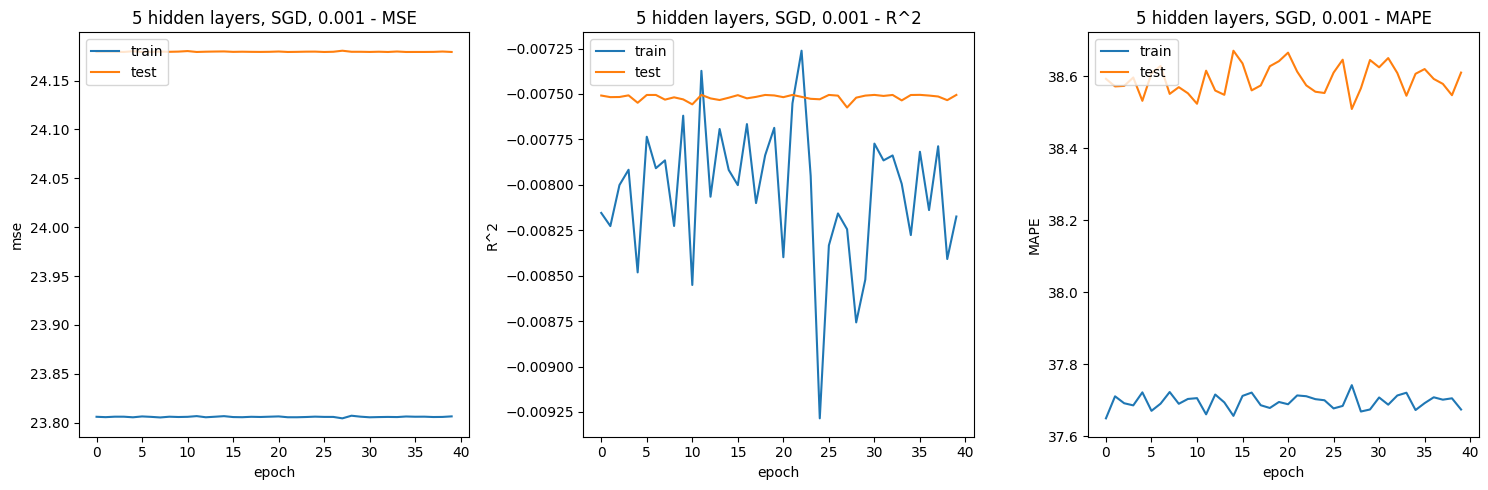

Epoch 1/40
844/844 [==============================] - 14s 11ms/step - loss: 4.0274 - mse: 24.4686 - r2: -0.0372 - mape: 38.0095 - val_loss: 4.0505 - val_mse: 24.8021 - val_r2: -0.0341 - val_mape: 36.8209
Epoch 2/40
844/844 [==============================] - 9s 10ms/step - loss: 3.9952 - mse: 24.0493 - r2: -0.0183 - mape: 37.7998 - val_loss: 4.0080 - val_mse: 24.2341 - val_r2: -0.0097 - val_mape: 39.2658
Epoch 3/40
844/844 [==============================] - 8s 10ms/step - loss: 3.9914 - mse: 24.0227 - r2: -0.0178 - mape: 37.7801 - val_loss: 4.0092 - val_mse: 24.2662 - val_r2: -0.0113 - val_mape: 37.8538
Epoch 4/40
844/844 [==============================] - 9s 11ms/step - loss: 3.9926 - mse: 24.0199 - r2: -0.0174 - mape: 37.8046 - val_loss: 4.0047 - val_mse: 24.1918 - val_r2: -0.0080 - val_mape: 38.9148
Epoch 5/40
844/844 [==============================] - 12s 15ms/step - loss: 3.9886 - mse: 23.9791 - r2: -0.0154 - mape: 37.7551 - val_loss: 4.0833 - val_mse: 25.2106 - val_r2: -0.0507 - v

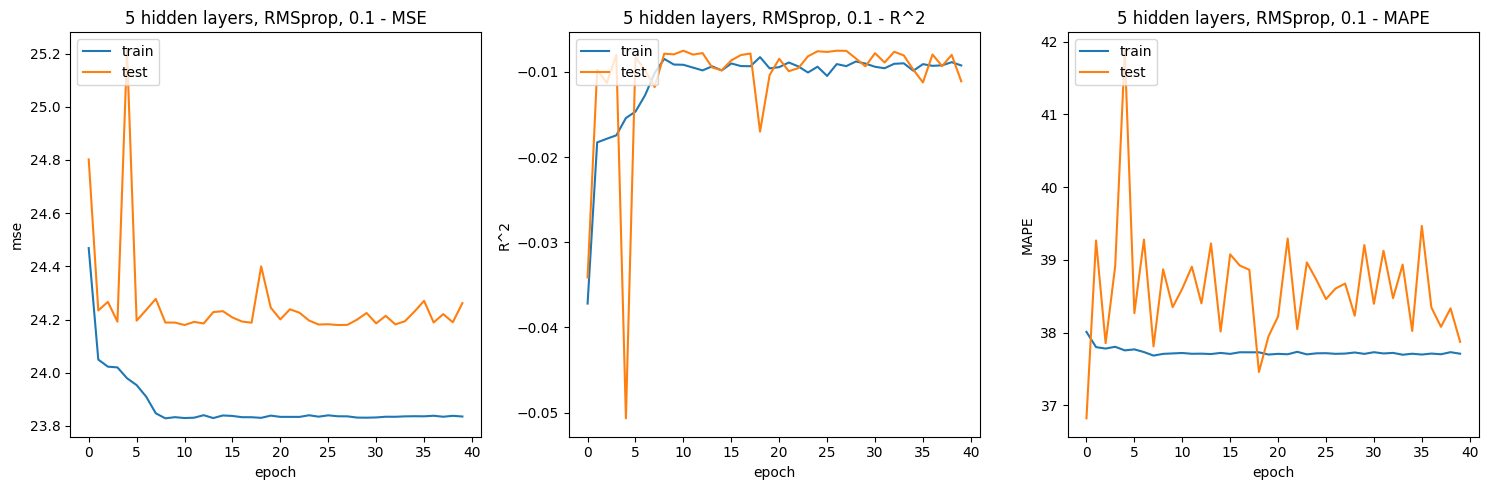

Epoch 1/40
844/844 [==============================] - 13s 11ms/step - loss: 3.9767 - mse: 23.8120 - r2: -0.0087 - mape: 37.6456 - val_loss: 4.0034 - val_mse: 24.1814 - val_r2: -0.0076 - val_mape: 38.4793
Epoch 2/40
844/844 [==============================] - 9s 10ms/step - loss: 3.9766 - mse: 23.8067 - r2: -0.0078 - mape: 37.7018 - val_loss: 4.0036 - val_mse: 24.1845 - val_r2: -0.0078 - val_mape: 38.4123
Epoch 3/40
844/844 [==============================] - 8s 9ms/step - loss: 3.9767 - mse: 23.8086 - r2: -0.0078 - mape: 37.6619 - val_loss: 4.0039 - val_mse: 24.1832 - val_r2: -0.0076 - val_mape: 38.7782
Epoch 4/40
844/844 [==============================] - 9s 10ms/step - loss: 3.9768 - mse: 23.8093 - r2: -0.0083 - mape: 37.7069 - val_loss: 4.0034 - val_mse: 24.1808 - val_r2: -0.0076 - val_mape: 38.5006
Epoch 5/40
844/844 [==============================] - 9s 10ms/step - loss: 3.9767 - mse: 23.8086 - r2: -0.0075 - mape: 37.6928 - val_loss: 4.0035 - val_mse: 24.1835 - val_r2: -0.0077 - val

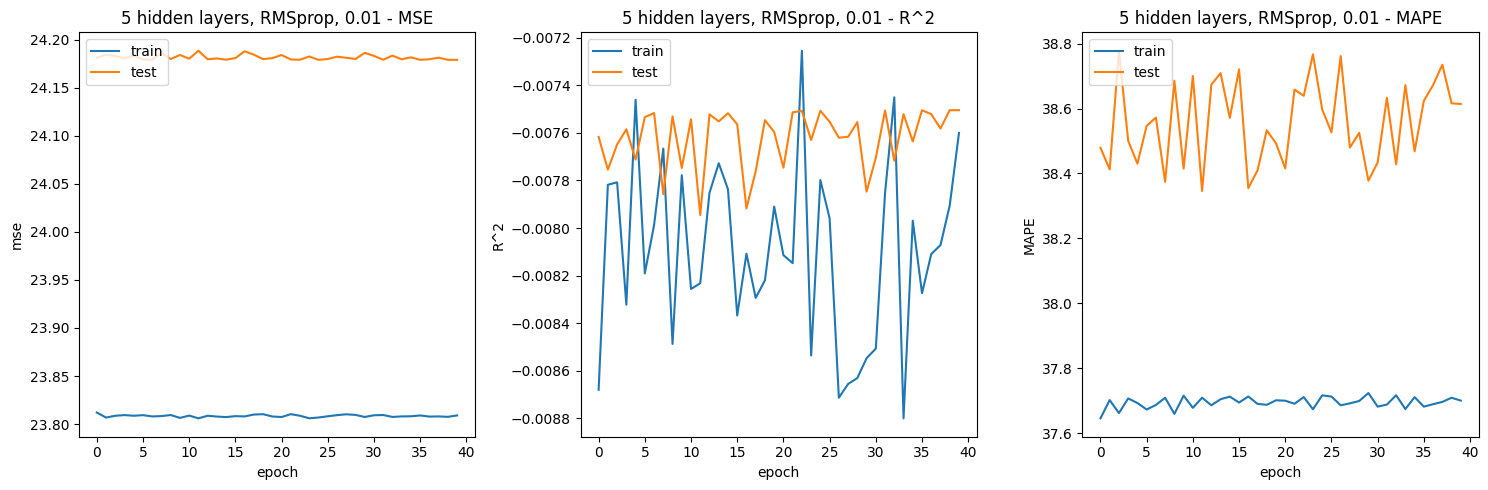

Epoch 1/40
844/844 [==============================] - 14s 10ms/step - loss: 3.9765 - mse: 23.8053 - r2: -0.0081 - mape: 37.6972 - val_loss: 4.0035 - val_mse: 24.1792 - val_r2: -0.0075 - val_mape: 38.6070
Epoch 2/40
844/844 [==============================] - 9s 10ms/step - loss: 3.9765 - mse: 23.8053 - r2: -0.0075 - mape: 37.7086 - val_loss: 4.0034 - val_mse: 24.1793 - val_r2: -0.0075 - val_mape: 38.5849
Epoch 3/40
844/844 [==============================] - 9s 10ms/step - loss: 3.9765 - mse: 23.8053 - r2: -0.0079 - mape: 37.7078 - val_loss: 4.0034 - val_mse: 24.1793 - val_r2: -0.0075 - val_mape: 38.5852
Epoch 4/40
844/844 [==============================] - 8s 10ms/step - loss: 3.9765 - mse: 23.8055 - r2: -0.0088 - mape: 37.7031 - val_loss: 4.0034 - val_mse: 24.1793 - val_r2: -0.0075 - val_mape: 38.5838
Epoch 5/40
844/844 [==============================] - 8s 10ms/step - loss: 3.9765 - mse: 23.8061 - r2: -0.0084 - mape: 37.6712 - val_loss: 4.0035 - val_mse: 24.1793 - val_r2: -0.0075 - va

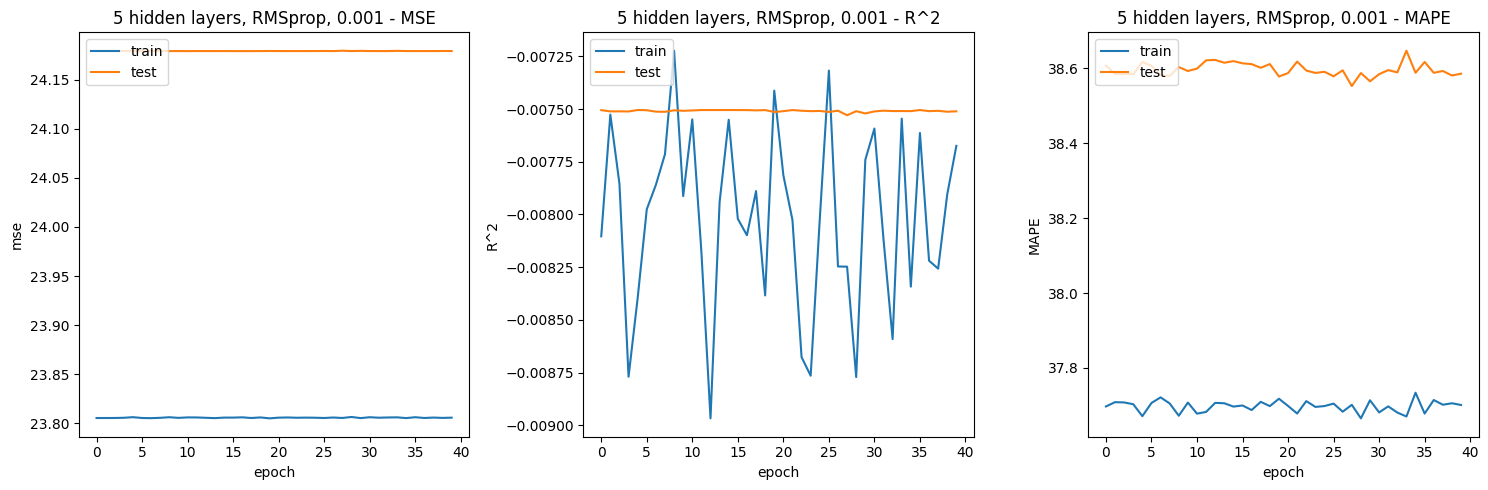

Epoch 1/40
844/844 [==============================] - 18s 12ms/step - loss: 3.9780 - mse: 23.8293 - r2: -0.0089 - mape: 37.7032 - val_loss: 4.0042 - val_mse: 24.1949 - val_r2: -0.0082 - val_mape: 38.2744
Epoch 2/40
844/844 [==============================] - 12s 15ms/step - loss: 3.9790 - mse: 23.8345 - r2: -0.0101 - mape: 37.7223 - val_loss: 4.0053 - val_mse: 24.1993 - val_r2: -0.0083 - val_mape: 38.9983
Epoch 3/40
844/844 [==============================] - 9s 10ms/step - loss: 3.9783 - mse: 23.8246 - r2: -0.0086 - mape: 37.7171 - val_loss: 4.0081 - val_mse: 24.2516 - val_r2: -0.0107 - val_mape: 37.9158
Epoch 4/40
844/844 [==============================] - 10s 11ms/step - loss: 3.9790 - mse: 23.8366 - r2: -0.0091 - mape: 37.7114 - val_loss: 4.0047 - val_mse: 24.2037 - val_r2: -0.0086 - val_mape: 38.1944
Epoch 5/40
844/844 [==============================] - 10s 11ms/step - loss: 3.9789 - mse: 23.8365 - r2: -0.0093 - mape: 37.7133 - val_loss: 4.0035 - val_mse: 24.1829 - val_r2: -0.0077 -

In [ ]:
optimizers = [SGD, RMSprop, Adam]
optimizers_names = ['SGD', 'RMSprop', 'Adam']
learning_rates = [0.1, 0.01, 0.001]
layer = 25

model = build_model(layer)

for i in range(len(optimizers)):
    for lr in learning_rates:

        model.compile(optimizer=optimizers[i](lr), loss='mean_absolute_error', metrics=['mse', r2, 'mape'])
        history = model.fit(X_train, y_train, epochs=40, validation_split=0.1, batch_size=128)

        # Графік кривих навчання
        print(history.history.keys())

        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        # MSE
        axs[0].plot(history.history['mse'])
        axs[0].plot(history.history['val_mse'])
        axs[0].set_title(f'5 hidden layers, {optimizers_names[i]}, {lr} - MSE')
        axs[0].set_ylabel('mse')
        axs[0].set_xlabel('epoch')
        axs[0].legend(['train', 'test'], loc='upper left')

        # R2
        axs[1].plot(history.history['r2'])
        axs[1].plot(history.history['val_r2'])
        axs[1].set_title(f'5 hidden layers, {optimizers_names[i]}, {lr} - R^2')
        axs[1].set_ylabel('R^2')
        axs[1].set_xlabel('epoch')
        axs[1].legend(['train', 'test'], loc='upper left')

        # MAPE
        axs[2].plot(history.history['mape'])
        axs[2].plot(history.history['val_mape'])
        axs[2].set_title(f'5 hidden layers, {optimizers_names[i]}, {lr} - MAPE')
        axs[2].set_ylabel('MAPE')
        axs[2].set_xlabel('epoch')
        axs[2].legend(['train', 'test'], loc='upper left')

        plt.tight_layout()
        plt.show()


## Завдання 3.

1. What models and combinations of hyper-parameters worked best? Why?
- На жаль, моє середовище несподівано відключилося, коли почала тренуватись остання модель (25 шарів) з останнім оптимізатором (Adam, lr = 0.1, 0.01, 0.001). Але в цілому, якщо поглянути на графіки навчання моделей, то модель з  25 прихованими шарами мала найгірші результати (а тому, ймовірно, при оптимізаторі Adam результати не стали б випадково найкращими з усіх графіків), щодо моделей з 5 шарами та з 1 шаром -- непогані, на мій погляд, результати при використання оптимізатора SGD при learning rate = 0.01 (в обох випадках).
2. Influence of optimizer?
- Очевидно, що оптимізатор має роль. Як на мене, найкраще справлявся з завданням SGD, в інших двох оптимізаторів (RMSprop та Adam) на графіках часто лінія тестових даних test розміщується вище (більше втрат), ніж лінія даних, на яких модель тренувалася, train. Або ж графік ще міг бути схожим на гіперболу, що теж недобре.
3. Influence of learning rate?
- Попри різні оптимізатори, а також архітектуру DNN, найкраще модель вчилася при learning rate = 0.01. При 0.1 було занадто багато "стрибків", лінія занадто ламана, тож, ймовірно, величина learning rate в такому випадку була надто великою, через що модель може "перестрибувати" оптимальний мінімум функції втрат. Learning rate 0.001 спричиняв недо-/перенавчання.
4. Influence of DNN architecture (number of layers)?
- 25 прихованих шарів було забагато, оптимальна їх кількість лежить між 1 та 5.
5. Influence of data distribution (linear or non-linear?)
- Лінійна регресія краще підходить для лінійних даних з лінійними залежностями між ними (наприклад, якщо розподіл Гаусівський). Для складніших нелінійних залежностей, нейронні мережі є кращим вибором. DNN зокрема може навчитися складнішим залежностям і автоматично виявляти функціональні залежності в даних, що дозволяє їм зазвичай краще моделювати нелінійність, а також мають можливість виявляти складні шаблони та взаємозв'язки в даних, в той час як ЛР може з цим не справитись.